In [1]:
library(ElemStatLearn)
library(caret)
data(vowel.train)
data(vowel.test) 
set.seed(33833)

vowel.train$y <- factor(vowel.train$y)
vowel.test$y <- factor(vowel.test$y)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
rfFit <- train( vowel.train$y ~ ., method="rf", data=vowel.train)
gbmFit <- train( vowel.train$y ~ ., method="gbm", data=vowel.train)

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Loading required package: gbm
Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.1
Loading required package: plyr

Attaching package: 'plyr'

The following object is masked from 'package:ElemStatLearn':

    ozone



Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        2.3979             nan     0.1000    0.3894
     2        2.1627             nan     0.1000    0.2270
     3        2.0188             nan     0.1000    0.1820
     4        1.8999             nan     0.1000    0.1388
     5        1.8006             nan     0.1000    0.1144
     6        1.7198             nan     0.1000    0.0927
     7        1.6502             nan     0.1000    0.0739
     8        1.5847             nan     0.1000    0.0838
     9        1.5270             nan     0.1000    0.0672
    10        1.4682             nan     0.1000    0.0590
    20        1.0847             nan     0.1000    0.0200
    40        0.6999             nan     0.1000    0.0148
    60        0.4895             nan     0.1000   -0.0014
    80        0.3614             nan     0.1000   -0.0001
   100        0.2695             nan     0.1000   -0.0027
   120        0.2031             nan     0.1000   -0.0020
   140        

In [3]:
gdmPred <- predict(gbmFit,vowel.test)
rfPred <- predict(rfFit,vowel.test)

In [4]:
confusionMatrix(vowel.test$y,rfPred)
#  Accuracy : 0.5974

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9 10 11
        1  30 11  1  0  0  0  0  0  0  0  0
        2   0 26 12  0  0  0  0  0  4  0  0
        3   0  3 32  2  0  3  0  0  0  0  2
        4   0  0  3 30  0  8  0  0  0  0  1
        5   0  0  0  2 16 21  3  0  0  0  0
        6   0  0  0  0  7 24  0  0  0  0 11
        7   0  0  0  0  7  6 26  0  3  0  0
        8   0  0  0  0  0  0  7 29  6  0  0
        9   0  0  0  0  0  0  5  6 23  2  6
        10  2 13  4  0  0  0  0  0  1 22  0
        11  0  1  0  1  0  5  3  0 13  0 19

Overall Statistics
                                          
               Accuracy : 0.5996          
                 95% CI : (0.5533, 0.6446)
    No Information Rate : 0.145           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5595          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Cl

In [5]:
confusionMatrix(vowel.test$y,gdmPred)
# Accuracy : 0.5325

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9 10 11
        1  30  9  1  0  0  0  0  0  0  2  0
        2   1 20 12  1  0  1  1  0  4  0  2
        3   0  1  9  9  0 16  0  0  0  0  7
        4   0  0  3 22  4 12  0  0  0  0  1
        5   0  0  0  3 19  9  8  0  0  0  3
        6   0  0  0  0  5 30  1  0  0  0  6
        7   0  1  0  1  2  2 34  2  0  0  0
        8   0  0  0  0  0  0  7 29  6  0  0
        9   0  0  0  0  0  3  3 10 26  0  0
        10  2 11  0  0  0  0  1  2  7 19  0
        11  0  0  0  1  0 11  9  0 17  0  4

Overall Statistics
                                          
               Accuracy : 0.5238          
                 95% CI : (0.4772, 0.5702)
    No Information Rate : 0.1818          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4762          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Cl

In [9]:
# combined Predictions
predDF <- data.frame(gdmPred,rfPred,y=vowel.test$y)
head(predDF)

,gdmPred,rfPred,y
1,1,1,1
2,1,2,2
3,3,3,3
4,4,4,4
5,5,5,5
6,6,6,6


In [10]:
combModFit <- train(y ~.,method="gam", data=predDF)
combPred <- predict(combModFit,predDF)

Warning message:
In gam.fit3(x = args$X, y = args$y, sp = lsp, Eb = args$Eb, UrS = args$UrS, : fitted probabilities numerically 0 or 1 occurredWarning message:
In gam.fit3(x = args$X, y = args$y, sp = lsp, Eb = args$Eb, UrS = args$UrS, : fitted probabilities numerically 0 or 1 occurredWarning message:
In gam.fit3(x = args$X, y = args$y, sp = lsp, Eb = args$Eb, UrS = args$UrS, : fitted probabilities numerically 0 or 1 occurredWarning message:
In gam.fit3(x = args$X, y = args$y, sp = lsp, Eb = args$Eb, UrS = args$UrS, : fitted probabilities numerically 0 or 1 occurredWarning message:
In gam.fit3(x = args$X, y = args$y, sp = lsp, Eb = args$Eb, UrS = args$UrS, : fitted probabilities numerically 0 or 1 occurredWarning message:
In gam.fit3(x = args$X, y = args$y, sp = lsp, Eb = args$Eb, UrS = args$UrS, : fitted probabilities numerically 0 or 1 occurredWarning message:
In gam.fit3(x = args$X, y = args$y, sp = lsp, Eb = args$Eb, UrS = args$UrS, : fitted probabilities numerically 0 or 1 occurre

In [11]:
confusionMatrix(vowel.test$y,combPred)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9 10 11
        1  30 12  0  0  0  0  0  0  0  0  0
        2   0 42  0  0  0  0  0  0  0  0  0
        3   0 42  0  0  0  0  0  0  0  0  0
        4   0 42  0  0  0  0  0  0  0  0  0
        5   0 42  0  0  0  0  0  0  0  0  0
        6   0 42  0  0  0  0  0  0  0  0  0
        7   0 42  0  0  0  0  0  0  0  0  0
        8   0 42  0  0  0  0  0  0  0  0  0
        9   0 42  0  0  0  0  0  0  0  0  0
        10  2 40  0  0  0  0  0  0  0  0  0
        11  0 42  0  0  0  0  0  0  0  0  0

Overall Statistics
                                         
               Accuracy : 0.1558         
                 95% CI : (0.124, 0.1922)
    No Information Rate : 0.9307         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0714         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 C

----

In [12]:

set.seed(3433)
library(AppliedPredictiveModeling)
data(AlzheimerDisease)
adData = data.frame(diagnosis,predictors)
inTrain = createDataPartition(adData$diagnosis, p = 3/4)[[1]]
training = adData[ inTrain,]
testing = adData[-inTrain,]

In [13]:
set.seed(62433)
rfFit <- train( training$diagnosis ~ ., method="rf", data=training)
btFit <- train( training$diagnosis ~ ., method="gbm", data=training)
ldaFit <- train( training$diagnosis ~ ., method="lda", data=training)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1413             nan     0.1000    0.0183
     2        1.0836             nan     0.1000    0.0285
     3        1.0504             nan     0.1000    0.0088
     4        1.0074             nan     0.1000    0.0201
     5        0.9696             nan     0.1000    0.0169
     6        0.9389             nan     0.1000    0.0123
     7        0.9044             nan     0.1000    0.0121
     8        0.8811             nan     0.1000    0.0094
     9        0.8597             nan     0.1000    0.0092
    10        0.8459             nan     0.1000    0.0014
    20        0.6777             nan     0.1000    0.0053
    40        0.4945             nan     0.1000    0.0025
    60        0.3762             nan     0.1000    0.0004
    80        0.2951             nan     0.1000    0.0005
   100        0.2334             nan     0.1000    0.0003
   120        0.1921             nan     0.1000   -0.0004
   140        

Loading required package: MASS
Warning message:
In lda.default(x, grouping, ...): variables are collinearWarning message:
In lda.default(x, grouping, ...): variables are collinearWarning message:
In lda.default(x, grouping, ...): variables are collinearWarning message:
In lda.default(x, grouping, ...): variables are collinear

In [14]:
rfPred <- predict(rfFit,testing)
btPred <- predict(btFit,testing)
ldaPred <- predict(ldaFit,testing)

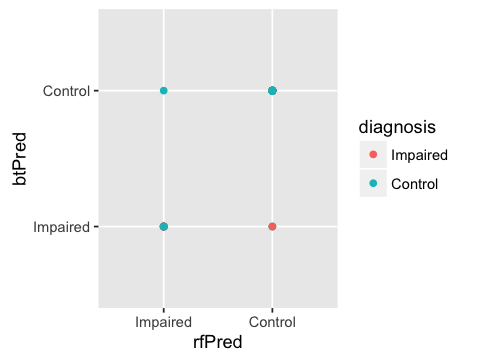

In [21]:
library(ggplot2)
options(jupyter.plot_mimetypes = "image/png") 
options(repr.plot.width = 4, repr.plot.height = 3)
qplot(rfPred,btPred,colour=diagnosis, data=testing)

In [16]:
predDF <- data.frame(rfPred,btPred,ldaPred,diagnosis=testing$diagnosis)
combModFit <- train(diagnosis ~., method="rf",data=predDF)
comPred <- predict(combModFit,predDF)

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



In [17]:
sqrt(sum( (as.numeric(rfPred)-as.numeric(testing$diagnosis))^2))
sqrt(sum( (as.numeric(btPred)-as.numeric(testing$diagnosis))^2))
sqrt(sum( (as.numeric(ldaPred)-as.numeric(testing$diagnosis))^2))
sqrt(sum( (as.numeric(comPred)-as.numeric(testing$diagnosis))^2))

[1] 4.242641

[1] 4

[1] 4.358899

[1] 3.872983

In [18]:
confusionMatrix(testing$diagnosis,rfPred)
confusionMatrix(testing$diagnosis,btPred)
confusionMatrix(testing$diagnosis,ldaPred)
confusionMatrix(testing$diagnosis,comPred)

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired       11      11
  Control         7      53
                                          
               Accuracy : 0.7805          
                 95% CI : (0.6754, 0.8644)
    No Information Rate : 0.7805          
    P-Value [Acc > NIR] : 0.5627          
                                          
                  Kappa : 0.4068          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 0.6111          
            Specificity : 0.8281          
         Pos Pred Value : 0.5000          
         Neg Pred Value : 0.8833          
             Prevalence : 0.2195          
         Detection Rate : 0.1341          
   Detection Prevalence : 0.2683          
      Balanced Accuracy : 0.7196          
                                          
       'Positive' Class : Impaired        
                                          

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired       13       9
  Control         7      53
                                          
               Accuracy : 0.8049          
                 95% CI : (0.7026, 0.8842)
    No Information Rate : 0.7561          
    P-Value [Acc > NIR] : 0.1851          
                                          
                  Kappa : 0.4883          
 Mcnemar's Test P-Value : 0.8026          
                                          
            Sensitivity : 0.6500          
            Specificity : 0.8548          
         Pos Pred Value : 0.5909          
         Neg Pred Value : 0.8833          
             Prevalence : 0.2439          
         Detection Rate : 0.1585          
   Detection Prevalence : 0.2683          
      Balanced Accuracy : 0.7524          
                                          
       'Positive' Class : Impaired        
                                          

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired       16       6
  Control        13      47
                                         
               Accuracy : 0.7683         
                 95% CI : (0.662, 0.8544)
    No Information Rate : 0.6463         
    P-Value [Acc > NIR] : 0.01219        
                                         
                  Kappa : 0.4639         
 Mcnemar's Test P-Value : 0.16867        
                                         
            Sensitivity : 0.5517         
            Specificity : 0.8868         
         Pos Pred Value : 0.7273         
         Neg Pred Value : 0.7833         
             Prevalence : 0.3537         
         Detection Rate : 0.1951         
   Detection Prevalence : 0.2683         
      Balanced Accuracy : 0.7193         
                                         
       'Positive' Class : Impaired       
                                         

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired       10      12
  Control         3      57
                                          
               Accuracy : 0.8171          
                 95% CI : (0.7163, 0.8938)
    No Information Rate : 0.8415          
    P-Value [Acc > NIR] : 0.77962         
                                          
                  Kappa : 0.4648          
 Mcnemar's Test P-Value : 0.03887         
                                          
            Sensitivity : 0.7692          
            Specificity : 0.8261          
         Pos Pred Value : 0.4545          
         Neg Pred Value : 0.9500          
             Prevalence : 0.1585          
         Detection Rate : 0.1220          
   Detection Prevalence : 0.2683          
      Balanced Accuracy : 0.7977          
                                          
       'Positive' Class : Impaired        
                                          

----

In [23]:
set.seed(3523)
library(AppliedPredictiveModeling)
data(concrete)
inTrain = createDataPartition(concrete$CompressiveStrength, p = 3/4)[[1]]
training = concrete[ inTrain,]
testing = concrete[-inTrain,]
set.seed(233)

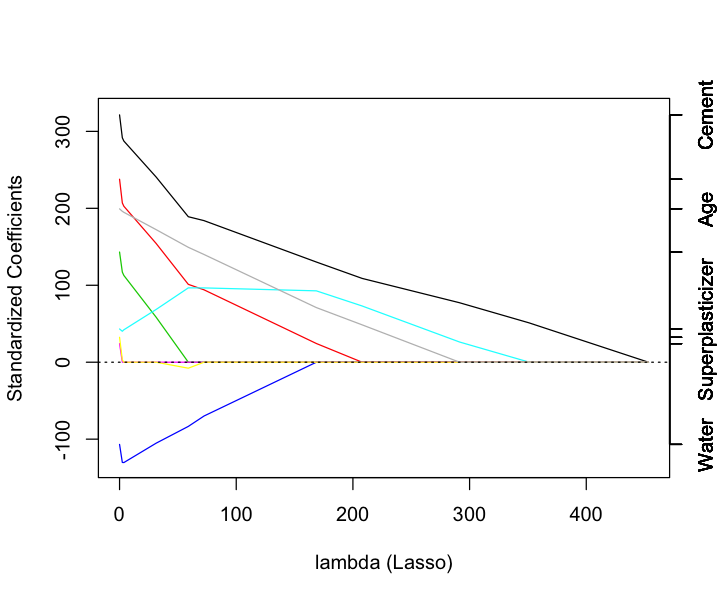

In [25]:
lassoFit <- train( training$CompressiveStrength ~ ., method="lasso", data=training)
lassoPred <- predict(lassoFit,testing)
options(repr.plot.width = 6, repr.plot.height = 5)
plot.enet(lassoFit$finalModel, xvar="penalty", use.color=T)


-----

In [27]:
library(e1071)

set.seed(3523)
library(AppliedPredictiveModeling)
data(concrete)
inTrain = createDataPartition(concrete$CompressiveStrength, p = 3/4)[[1]]
training = concrete[ inTrain,]
testing = concrete[-inTrain,]


Attaching package: 'e1071'

The following objects are masked from 'package:timeDate':

    kurtosis, skewness



In [28]:
set.seed(325)
svmFit <- svm(CompressiveStrength ~ ., data = training)
svmPred <- predict(svmFit,testing)
accuracy(svmPred, testing$CompressiveStrength)

,ME,RMSE,MAE,MPE,MAPE
Test set,0.1682863,6.7150092,5.1208353,-7.1023480,19.2773933
